# <font color='gold'> **Análise Exploratória: Relações entre Música e Saúde Mental** </font> 🎵🧠

## <font color='gold'>***Objetivos da Análise*** 🎯:</font>

Nesse projeto, iremos realizar uma análise exploratória de um [Dataset](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results) que contém dados de uma pesquisa relacionada a ***"Music Therapy"***, onde se buscou compreender quais as correlações (se existirem) entre gêneros musicais preferidos pelos participantes e sua saúde mental.
 
Em mais detalhes, outro objetivo é concluir essa análise seguindo alguns passos:

- 🎲 Checar as características gerais dos dados, como formato, tipo dos dados, quantidade de valores nulos e outliers (se existirem), etc;

- 🧹 Realizar a limpeza e tratamento necessários dos dados;

- 📊 Utilizar de visualizações gráficas para gerar insights acerca dos dados;
     
     - Para as visualizações, o foco desse projeto é aprimorar meus conhecimentos e aplicações nas bibliotecas ***Seaborn*** e ***Matplotlib***.

Após a etapa de limpeza serão definidas algumas questões e propostas de análise, que irão ser abordadas na etapa de visualização.

## <font color='gold'>***Importando Pacotes e Definindo Funções***</font>

In [582]:
# Importando bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Definindo parâmetros:
sns.set_theme(context='notebook', style="darkgrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_info_columns', 150)
warnings.filterwarnings('ignore')

print('Pacotes prontos!')

Pacotes prontos!


- Função para plotar um Boxplot:

In [573]:
def dataBoxplot(data: pd.DataFrame, column: pd.Series, graphTitle: str):

    fig, ax1 = plt.subplots(figsize=(15, 5))
    ax2 = sns.boxplot(
        data=data,
        x=column,
        flierprops={"marker": "x"}, 
        color='#004d80',
        medianprops={"color": "red"}, 
        linewidth=2
    )
    ax2.set_title(
        graphTitle,
        loc='center',
        fontdict={
            'size': 16, 
            'weight': 'bold', 
            'family': 'serif'
            }
    )

- Função para crição de Pie Charts:

In [574]:
def pieCharts(quantity:int, labels:str, colors:str, explode:float, graphTitle:str):

    plt.pie(
        quantity,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        pctdistance=0.85,
        explode=explode
    )

    circle = plt.Circle((0,0), 0.70, fc='white')

    figure = plt.gcf()
    figure.gca().add_artist(circle)

    plt.title(
        graphTitle,
        fontdict={'size': 15,}
    )

## <font color='gold'> ***Características dos Dados*** </font>

In [575]:
# Criando Dataframe:
data = pd.read_csv('data/mxmh_survey_results.csv', sep=',')

In [576]:
# Checando os primeiros 5 registros:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [577]:
# Sample aleatória:
data.sample(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
455,9/1/2022 14:56:21,34.0,Spotify,0.0,No,Yes,No,Rock,No,Yes,115.0,Rarely,Rarely,Never,Sometimes,Never,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Very frequently,Never,3.0,7.0,8.0,0.0,Worsen,I understand.
520,9/2/2022 7:29:17,19.0,I do not use a streaming service.,1.0,Yes,Yes,No,Video game music,No,No,127.0,Very frequently,Never,Never,Rarely,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Rarely,Very frequently,7.0,5.0,7.0,0.0,Improve,I understand.
481,9/1/2022 18:02:53,28.0,Other streaming service,1.0,Yes,No,No,Lofi,Yes,Yes,82.0,Sometimes,Rarely,Rarely,Rarely,Rarely,Sometimes,Sometimes,Rarely,Sometimes,Very frequently,Rarely,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,4.0,8.0,5.0,0.0,Improve,I understand.
379,8/29/2022 17:04:16,15.0,Pandora,2.0,Yes,Yes,No,Pop,Yes,No,145.0,Rarely,Sometimes,Never,Never,Never,Never,Never,Rarely,Very frequently,Never,Never,Very frequently,Sometimes,Sometimes,Never,Never,6.0,0.0,0.0,2.0,Improve,I understand.
460,9/1/2022 15:21:55,23.0,YouTube Music,4.0,No,No,No,Hip hop,Yes,No,72.0,Rarely,Rarely,Never,Rarely,Never,Very frequently,Rarely,Never,Never,Sometimes,Rarely,Very frequently,Sometimes,Sometimes,Sometimes,Rarely,8.0,10.0,4.0,0.0,No effect,I understand.


In [578]:
# Checando nomes das colunas do Dataset:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

Para poder termos uma compreensão clara de todas as variáveis presentes no Dataset, realizaremos uma definição de cada uma a seguir.
- As definições das variáveis foram retiradas diretamente da página do Kaggle onde foram coletados os dados.

| <p align='center'>**Variável**</p>| <p align='center'>**Conteúdo**</p>                                                  |
|-----------------------------------|-------------------------------------------------------------------------------------|
| *`Timestamp`*                     | Data e Hora de quando a pesquisa foi respondida pelo participante.                  |
| *`Age`*                           | Idade do participante.                                                              |
| *`Primary Streaming Service`*     | Qual o aplicativo de música principal que o participante utiliza.                   |
| *`Hours per Day`*                 | Número de horas que o participante escuta de música por dia.                        |
| *`While Working`*                 | O participante escuta música enquanto trabalha?                                     |
| *`Instrumentalist`*               | O participante toca algum instrumento musical regularmente?                         |
| *`Composer`*                      | O participante é compositor de música?                                              |
| *`Fav Genre`*                     | Gênero musical favorito/mais escutado do participante.                              |
| *`Exploratory`*                   | O participante ativamente busca conhecer gêneros diferentes de música?              |
| *`Foreign Languages`*             | O participante regularmente escuta músicas em línguas na qual não possuí fluência?  |
| *`BPM`*                           | "Beats per Minute" (tempo) do gênero musical favorito do participante.              |
| *`Frequency [Classical]`*         | Quão frequentemente o participante escuta música Clásica.                           |
| *`Frequency [Country]`*           | Quão frequentemente o participante escuta música Country.                           |
| *`Frequency [EDM]`*               | Quão frequentemente o participante escuta música EDM.                               |
| *`Frequency [Folk]`*              | Quão frequentemente o participante escuta música folk.                              |
| *`Frequency [Gospel]`*            | Quão frequentemente o participante escuta música Gospel.                            |
| *`Frequency [Hip Hop]`*           | Quão frequentemente o participante escuta Hip Hop.                                  |
| *`Frequency [Jazz]`*              | Quão frequentemente o participante escuta Jazz.                                     |
| *`Frequency [K Pop]`*             | Quão frequentemente o participante escuta K Pop.                                    |
| *`Frequency [Latin]`*             | Quão frequentemente o participante escuta música Latina.                            |
| *`Frequency [Lofi]`*              | Quão frequentemente o participante escuta Lofi.                                     |
| *`Frequency [Metal]`*             | Quão frequentemente o participante escuta Metal.                                    |
| *`Frequency [Pop]`*               | Quão frequentemente o participante escuta música Pop.                               |
| *`Frequency [R&B]`*               | Quão frequentemente o participante escuta R&B (Rhythm and Blues).                   |
| *`Frequency [Rap]`*               | Quão frequentemente o participante escuta Rap.                                      |
| *`Frequency [Rock]`*              | Quão frequentemente o participante escuta Rock.                                     |
| *`Frequency [Video Game Music]`*  | Quão frequentemente o participante escuta músicas de Video Game.                    |
| *`Anxiety`*                       | Nível de ansiedade (classificada de 0-10) reportado pelo participante.              |
| *`Drepession`*                    | Nível de depressão (classificada de 0-10) reportado pelo participante.              |
| *`Insomnia`*                      | Nível de insônia (classificada de 0-10) reportado pelo participante.                |
| *`OCD`*                           | Nível de OCD (TOC) (classificada de 0-10) reportado pelo participante.              |
| *`Music Effects`*                 | Música melhoram ou pioram a saúde mental do participante?                           |
| *`Permissions`*                   | Permissões concedidas pelos participantes para a publicação dos dados.              |

In [579]:
# Shape:
data.shape

(736, 33)

O Dataset contém **736 registros** em **33 variáveis** diferentes.

In [580]:
# Dividindo as colunas em duas variáveis para facilitar a visualização
# utilizando o comando .info() a seguir:
columns_1 = [
    'Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
    'While working', 'Instrumentalist', 'Composer', 'Fav genre',
    'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
    'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
    'Frequency [Gospel]', 'Frequency [Hip hop]'
    ]

columns_2 = [
    'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
    'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
    'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
    'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 'Permissions'
    ]

In [581]:
# Visualizando informações das primeiras 17 colunas:
data[columns_1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  736 non-null    object 
 1   Age                        735 non-null    float64
 2   Primary streaming service  735 non-null    object 
 3   Hours per day              736 non-null    float64
 4   While working              733 non-null    object 
 5   Instrumentalist            732 non-null    object 
 6   Composer                   735 non-null    object 
 7   Fav genre                  736 non-null    object 
 8   Exploratory                736 non-null    object 
 9   Foreign languages          732 non-null    object 
 10  BPM                        629 non-null    float64
 11  Frequency [Classical]      736 non-null    object 
 12  Frequency [Country]        736 non-null    object 
 13  Frequency [EDM]            736 non-null    object 

In [588]:
# Informações das últimas 16 colunas:
data[columns_2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frequency [Jazz]              736 non-null    object 
 1   Frequency [K pop]             736 non-null    object 
 2   Frequency [Latin]             736 non-null    object 
 3   Frequency [Lofi]              736 non-null    object 
 4   Frequency [Metal]             736 non-null    object 
 5   Frequency [Pop]               736 non-null    object 
 6   Frequency [R&B]               736 non-null    object 
 7   Frequency [Rap]               736 non-null    object 
 8   Frequency [Rock]              736 non-null    object 
 9   Frequency [Video game music]  736 non-null    object 
 10  Anxiety                       736 non-null    float64
 11  Depression                    736 non-null    float64
 12  Insomnia                      736 non-null    float64
 13  OCD  

**Primeiras 17 colunas (columns_1):**

> Sobre Nulos:
> - Algumas colunas possuem poucos valores faltantes;
>    
> - Coluna `BPM` é a que possuí mais valores nulos.
>
> Sobre Data Types:
> - Coluna `Timestamp` não está em um formato adequado. Além disso, ela não será relevante para as análises.
>
> - Coluna `Age` não tem motivo para estar em float. Será transformada em int;
> 
> - Coluna `BPM` está em float sendo que músicas são produzidas utilizando BPM's inteiros;

**Últimas 16 colunas (columns_2):**

> Sobre Nulos:
> - Apenas a coluna `Music effects` possui valores nulos.
>
> Sobre Data types:
> - As colunas `Anxiety`, `Depression`, `Insomnia` e `OCD` estão em float. Adiante irei checá-las em busca de valores float, não os encontrando, passarei todas para int;
>
> - A coluna `Permissions` não tem relevância para as análises que serão realizadas.

In [589]:
# Checando se existem valores float nas colunas mencionadas acima:
tables = {
    'Anxiety': list(data['Anxiety'].unique()),
    'Depression': list(data['Depression'].unique()),
    'Insomnia': list(data['Insomnia'].unique()),
    'OCD': list(data['OCD'].unique())
}

for (column, values) in tables.items():
    print(f'{column:11} --> {values}')

Anxiety     --> [3.0, 7.0, 9.0, 8.0, 4.0, 5.0, 2.0, 1.0, 6.0, 10.0, 0.0, 7.5]
Depression  --> [0.0, 2.0, 7.0, 8.0, 3.0, 1.0, 4.0, 5.0, 9.0, 10.0, 6.0, 3.5]
Insomnia    --> [1.0, 2.0, 10.0, 3.0, 5.0, 7.0, 6.0, 0.0, 4.0, 8.0, 9.0, 3.5]
OCD         --> [0.0, 1.0, 2.0, 3.0, 9.0, 7.0, 4.0, 6.0, 10.0, 5.0, 8.0, 8.5, 5.5]


Como existem valores float, não iremos alterar os Data Types dessas colunas.

In [590]:
# Usando método describe nas colunas numéricas:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


Com essas informações, podemos ter alguns insights sobre os dados e suas distribuição:

- `Age`: Temos registros de pessoas que variam entre 10 e 89 anos de idade na pesquisa;

- `Hours per day`: O registro máximo dessa coluna indica um dado peculiar, alguém relatou ouvir música 24 horas por dia. Esse caso será estudado com mais detalhe buscando compreender a situação;

- `BPM`: Claramente temos a presença de outliers, o valor máximo é de 999999999;

Também iremos checar as características das variáveis categóricas no dataset:

In [591]:
# Usando método describe nas colunas categóricas:
data.describe(exclude='number').T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


Algumas características que podemos identificar:

- O streaming service mais utilizado é o **Spotify**;

- Os gêneros mais frequentemente ouvidos pelos participantes da pesquisa são **Pop** e **Rock**;

- A maioria dos participantes relataram que a música **melhora** sua saúde mental.

## <font color='gold'> ***Boxplots: Checando Outliers*** </font>

Como observado utilizando o método .describe(), temos três colunas em particular que merecem uma atenção mais detalhada: 
- `Hours per Day`: relato de alguém que escuta música 24 horas por dia;

- `BPM`: Valor máximo da coluna não corresponde aos outros.

- `Age`: 75% dos dados vaõ até 28 anos de idade, porém o máximo registrado é de 89.

Para termos uma visualização melhor delas, iremos plotar boxplots em busca desses outliers e também utilizar o método .loc[] para identificarmos esses registros.

### **Coluna Hours per Day**

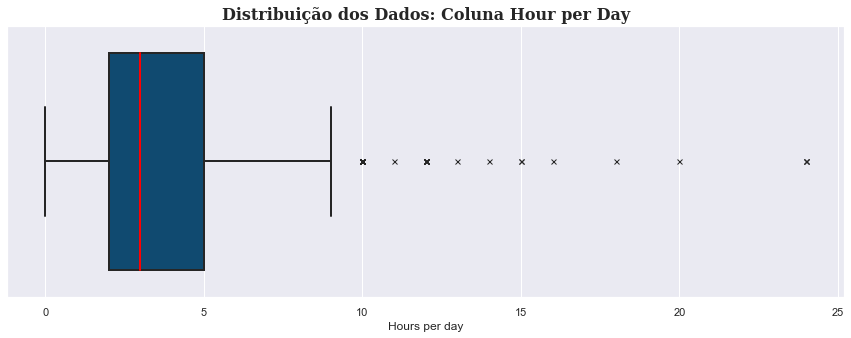

In [464]:
dataBoxplot(data, 'Hours per day', 'Distribuição dos Dados: Coluna Hour per Day')

In [465]:
# Printando a quantidade de registros que constam acima de 12 horas ouvindo música:
print('Registros constando mais de 12 horas ouvindo música:')
print(f'{len(data[data["Hours per day"] > 12])} entradas.')
print("{:.2f}%".format((len(data[data['Hours per day'] > 12]) / data.shape[0]) * 100))

Registros constando mais de 12 horas ouvindo música:
10 entradas.
1.36%


In [466]:
# Visualizando esses registros:
hpd_outliers_viz = data.query('`Hours per day` > 12')
hpd_outliers_viz

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
18,8/27/2022 23:40:55,17.0,Spotify,24.0,Yes,No,No,Rap,Yes,No,99.0,Rarely,Never,Never,Never,Never,Sometimes,Sometimes,Sometimes,Rarely,Never,Sometimes,Rarely,Sometimes,Very frequently,Very frequently,Never,7.0,5.0,0.0,3.0,Improve,I understand.
290,8/29/2022 2:46:27,27.0,Spotify,20.0,Yes,No,No,Rock,Yes,Yes,NaN,Sometimes,Rarely,Sometimes,Rarely,Never,Rarely,Never,Sometimes,Rarely,Sometimes,Very frequently,Rarely,Never,Rarely,Very frequently,Sometimes,8.0,10.0,10.0,8.0,No effect,I understand.
347,8/29/2022 9:42:23,18.0,Spotify,16.0,Yes,No,Yes,Jazz,Yes,Yes,90.0,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Very frequently,Very frequently,Very frequently,Very frequently,Very frequently,Very frequently,Very frequently,Very frequently,Very frequently,Very frequently,Rarely,3.0,2.0,5.0,6.0,Improve,I understand.
359,8/29/2022 11:02:29,16.0,Spotify,15.0,Yes,Yes,Yes,EDM,Yes,No,85.0,Rarely,Never,Very frequently,Never,Never,Rarely,Rarely,Never,Never,Rarely,Sometimes,Sometimes,Never,Very frequently,Very frequently,Sometimes,8.0,10.0,9.0,2.0,Improve,I understand.
366,8/29/2022 12:32:30,16.0,Spotify,24.0,Yes,No,No,Rock,Yes,Yes,120.0,Never,Never,Rarely,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely,Sometimes,Rarely,5.0,1.0,9.0,1.0,Improve,I understand.
407,8/29/2022 23:20:48,26.0,Spotify,14.0,Yes,No,No,Hip hop,Yes,Yes,158.0,Sometimes,Sometimes,Rarely,Very frequently,Never,Very frequently,Very frequently,Rarely,Rarely,Very frequently,Rarely,Sometimes,Very frequently,Very frequently,Very frequently,Rarely,5.0,10.0,8.0,0.0,No effect,I understand.
426,8/30/2022 16:47:39,30.0,Spotify,13.0,NaN,No,No,K pop,Yes,Yes,145.0,Sometimes,Never,Rarely,Sometimes,Never,Sometimes,Sometimes,Very frequently,Very frequently,Rarely,Rarely,Very frequently,Very frequently,Sometimes,Very frequently,Sometimes,10.0,10.0,10.0,7.0,Improve,I understand.
485,9/1/2022 19:08:55,55.0,YouTube Music,15.0,Yes,No,No,Rock,No,No,156.0,Rarely,Never,Never,Very frequently,Never,Never,Sometimes,Never,Rarely,Never,Never,Rarely,Never,Never,Very frequently,Never,2.0,0.0,3.0,0.0,No effect,I understand.
695,9/28/2022 17:25:48,89.0,Spotify,24.0,Yes,Yes,Yes,Rap,No,No,143.0,Never,Never,Rarely,Rarely,Never,Very frequently,Sometimes,Never,Never,Rarely,Rarely,Rarely,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect,I understand.
726,10/23/2022 20:50:27,18.0,Apple Music,18.0,Yes,No,No,EDM,Yes,No,90.0,Sometimes,Rarely,Very frequently,Never,Rarely,Sometimes,Sometimes,Never,Never,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Sometimes,9.0,8.0,5.0,10.0,Improve,I understand.


Podemos tentar compreender mais a fundo quais os motivos desses dados serem díspares em relação aos outros quando se trata de tempo por dia ouvindo música. Uma boa métrica é analisar e comparar a média de pontuação atribuída as condições mentais nos dados outliers com os dados originais, buscando analisar se alguma dessas condições influenciam no tempo ouvido de música por dia:

In [467]:
# Média dos dos pontos atribuídos a condições mentais dos registros gerais,
# excluíndo os dados acima de 12 horas por dia de música:
anx_mean_original = data.query('`Hours per day` < 12')['Anxiety'].mean()
dep_mean_original = data.query('`Hours per day` < 12')['Depression'].mean()
ins_mean_original = data.query('`Hours per day` < 12')['Insomnia'].mean()
ocd_mean_original = data.query('`Hours per day` < 12')['OCD'].mean()

# Tirando a média dos pontos atribuídos a condições mentais dos registros outliers:
anx_mean_outlier = hpd_outliers_viz['Anxiety'].mean()
dep_mean_outlier = hpd_outliers_viz['Depression'].mean()
ins_mean_outlier = hpd_outliers_viz['Insomnia'].mean()
ocd_mean_outlier = hpd_outliers_viz['OCD'].mean()

In [468]:
print('Médias de Avaliação por Condição Mental: Acima de 12 horas ouvindo música:')
print(f'Ansiedade: {anx_mean_outlier}')
print(f'Depressão: {dep_mean_outlier}')
print(f'Insônia: {ins_mean_outlier}')
print(f'OCD (TOC): {ocd_mean_outlier}')

print('-='*50)

print('Médias de Avaliação por Condição Mental: Abaixo de 12 horas ouvindo música:')
print(f'Ansiedade: {round(anx_mean_original, 1)}')
print(f'Depressão: {round(dep_mean_original, 1)}')
print(f'Insônia: {round(ins_mean_original, 1)}')
print(f'OCD (TOC): {round(ocd_mean_original, 1)}')

Médias de Avaliação por Condição Mental: Acima de 12 horas ouvindo música:
Ansiedade: 5.7
Depressão: 5.6
Insônia: 5.9
OCD (TOC): 3.7
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Médias de Avaliação por Condição Mental: Abaixo de 12 horas ouvindo música:
Ansiedade: 5.8
Depressão: 4.8
Insônia: 3.7
OCD (TOC): 2.6


Com essa visualização e com a comparação dos pontos atribuídos às condições mentais em ambos os datasets, algumas características podem ser notadas:
- Exatamente metade desses registros (5 entradas) são de pessoas abaixo dos 20 anos de idade;

- Boa parte desses registros constam valores altos nas métricas de condições mentais como Ansiedade e Insônia;

- A média de Depressão, Insônia e OCD são maiores nos registros que constam mais de 12 horas por dia ouvindo música, com destaque a Insônia, que possui a maior variação de todas as condições relatadas quando comparada ao dataset original. Isso pode apontar que pessoas que possuem insônia ficam muito mais tempo acordadas e também passam mais tempo ouvindo música.

Com essas análises acerca dos outliers em relação ao tempo ouvido de música por dia realizada, iremos removê-los dos dados no geral para prosseguir com as análises. isso será feito na etapa de limpeza do dataset.

### **Coluna BPM**

Como temos um outlier tão claro nessa coluna, não será necessário o uso do boxplot, iremos apenas filtrar os dados com o uso do loc[].

- O método describe utilizado anteriormente apontava que 75% dos dados estão abaixo de 144 BPM, sendo assim, iremos dar uma margem nesse limite e extendê-lo a 180 BPM, buscando remover os registros acima disso na etapa de limpeza.

In [469]:
# Calculando quantos registros estão acima de 180 BPM:
print('Registros acima de 180 BPM:')
print(f'{len(data[data["BPM"] > 180])} entradas.')
print("{:.2f}%".format((len(data[data['BPM'] > 180]) / data.shape[0]) * 100))

Registros acima de 180 BPM:
28 entradas.
3.80%


In [470]:
# Visualizando essas entradas:
bpm_outliers_viz = (
    data
    .query('BPM > 180')[
        ['Age', 'Primary streaming service', 'Hours per day', 'Instrumentalist', 
        'Fav genre','Exploratory', 'BPM','Anxiety', 'Depression','Insomnia', 
        'OCD', 'Music effects']]
    .reset_index()
    .drop(columns='index')
)

bpm_outliers_viz

,Age,Primary streaming service,Hours per day,Instrumentalist,Fav genre,Exploratory,BPM,Anxiety,Depression,Insomnia,OCD,Music effects
0,17.0,Apple Music,1.0,No,Pop,Yes,183.0,8.0,2.0,1.0,5.0,Improve
1,22.0,Spotify,10.0,No,Metal,Yes,189.0,9.0,6.0,0.0,6.0,Improve
2,31.0,Spotify,2.0,No,Rock,Yes,200.0,8.0,9.0,6.0,2.0,Improve
3,15.0,Spotify,8.0,No,Rock,No,193.0,8.0,7.0,5.0,0.0,Improve
4,29.0,Other streaming service,5.0,No,Jazz,Yes,200.0,7.0,2.0,3.0,1.0,Improve
5,27.0,Spotify,10.0,No,Metal,Yes,185.0,5.0,6.0,6.0,3.0,Improve
6,28.0,I do not use a streaming service.,4.0,No,Rock,Yes,194.0,6.0,8.0,1.0,6.0,Improve
7,18.0,Spotify,1.0,Yes,Metal,Yes,190.0,6.0,9.0,9.0,0.0,Improve
8,27.0,Spotify,10.0,No,Metal,Yes,194.0,8.0,8.0,3.0,0.0,Improve
9,64.0,I do not use a streaming service.,4.0,No,Rock,No,200.0,4.0,4.0,2.0,1.0,Improve


Visualizando esses outliers, algumas informações podem ser inferidas:
- Provavelmente algumas dessas pessoas não sabiam informar de maneira correta/precisa o BPM de seu gênero favorito, posto que esse dado não é tão exato, por exemplo, metal pode [variar entre 100 a 180 BPM em média](https://www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/), podendo ter valores acima ou abaixo e ainda serem considerados metal. Isso pode ter acarretado em participantes da pesquisa inserindo valores que acharam correto ou simplesmente valores aleatórios apenas para preencher o formulário, como exemplo disso o registro de 999999999.

- Alguns dados que apontam para isso são, por exemplo, o de número 16, que aponta o gênero mais ouvido do entrevistado sendo Jazz, porém com um BPM de 200, muito acima da média de 120 - 125 do gênero. O registro de número 24 é outro exemplo, ponde o participante consta ouvir música EDM com 624 BPM.

### **Coluna Age**

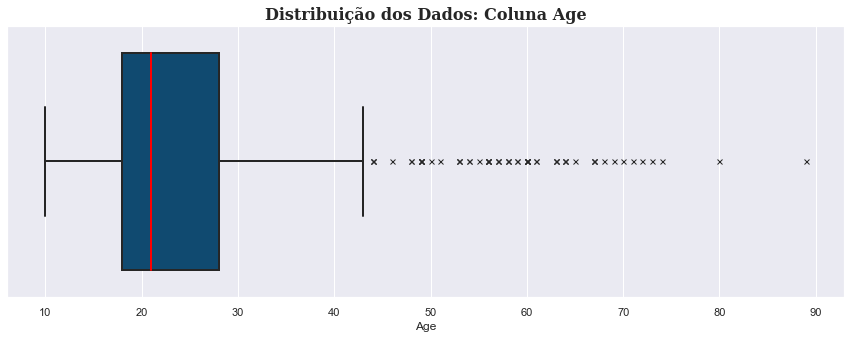

In [471]:
dataBoxplot(data, 'Age', 'Distribuição dos Dados: Coluna Age')

De acordo com o boxplot e também pelo exposto pelo método describe, temos a média de idade em 21 anos e o limite do quarto quantil 28 anos. Acima de por volta de 43 anos de idade temos diversos outliers, porém, é esperado que pessoas acima dessa idade também participem da pesquisa.

No entanto, notamos um gap após de alguns registros acima de 70 anos que são dados tão esparços que serão retirados. 

In [472]:
# Calculando quantos registros estão acima de 70 anos:
print('Registros acima de 70 anos:')
print(f'{len(data[data["Age"] > 70])} entradas.')
print("{:.2f}%".format((len(data[data['Age'] > 70]) / data.shape[0]) * 100))

Registros acima de 70 anos:
6 entradas.
0.82%


In [473]:
# Criando a variável que conterá os dados para remoção:
age_outliers_viz = data.query('Age > 70')
age_outliers_viz

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
428,8/30/2022 17:43:36,72.0,Spotify,6.00,Yes,Yes,Yes,Rock,No,No,77.0,Never,Sometimes,Never,Never,Never,Never,Very frequently,Never,Sometimes,Never,Never,Rarely,Very frequently,Never,Very frequently,Never,0.0,1.0,0.0,2.0,Improve,I understand.
429,8/30/2022 18:15:39,73.0,Pandora,3.00,Yes,No,No,R&B,Yes,Yes,4.0,Sometimes,Very frequently,Rarely,Sometimes,Very frequently,Sometimes,Sometimes,Rarely,Very frequently,Never,Rarely,Sometimes,Very frequently,Sometimes,Sometimes,Never,5.0,4.0,0.0,1.0,Improve,I understand.
490,9/1/2022 19:44:33,71.0,I do not use a streaming service.,0.25,Yes,No,No,Gospel,No,Yes,NaN,Sometimes,Rarely,Never,Rarely,Sometimes,Never,Never,Never,Sometimes,Never,Never,Rarely,Rarely,Never,Rarely,Never,1.0,0.0,0.0,0.0,Improve,I understand.
494,9/1/2022 21:07:33,74.0,I do not use a streaming service.,1.00,No,No,No,Pop,No,No,129.0,Rarely,Very frequently,Never,Sometimes,Sometimes,Never,Rarely,Never,Sometimes,Never,Never,Very frequently,Sometimes,Never,Sometimes,Never,4.0,2.0,1.0,0.0,Improve,I understand.
527,9/2/2022 14:09:04,80.0,I do not use a streaming service.,3.00,Yes,Yes,No,Classical,No,No,122.0,Very frequently,Rarely,Never,Rarely,Never,Never,Rarely,Rarely,Never,Rarely,Rarely,Sometimes,Never,Never,Never,Sometimes,7.0,3.0,9.0,2.0,Improve,I understand.
695,9/28/2022 17:25:48,89.0,Spotify,24.00,Yes,Yes,Yes,Rap,No,No,143.0,Never,Never,Rarely,Rarely,Never,Very frequently,Sometimes,Never,Never,Rarely,Rarely,Rarely,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect,I understand.


## <font color='gold'> ***Limpeza e Transformação dos Dados*** </font>

Após conhecermos melhor as características do nosso Dataset e de compreender as situações dos valores outliers, partiremos para a etapa de limpeza e transformação dos dados, onde iremos deixar os dados na melhor forma possível para as visualizações gráficas posteriores. Como etapas teremos:

- Remoção das colunas **`Timestamp`** e **`Permissions`** pois não serão necessárias para as análises;

- Remoção dos outliers constatados na etapa anterior;

- Preencher valores nulos;

- Alterar Data types necessários.

In [474]:
# Criação de uma cópia do Dataset para limpeza:
data_clean = data.copy()

In [475]:
# Remoção das colunas Timestamp e Permissions:
data_clean = data_clean.drop(['Timestamp', 'Permissions'], axis=1)

Como o Dataset contém múltiplas colunas que informam a Frequência com o qual o entrevistado escuta os gêneros musicais diferentes e todas são de frequência, iremos renomear essas colunas para constar apenas o nome do gênero musical:

In [514]:
data_clean = data_clean.rename(columns={
    'Frequency [Classical]': 'Classical',          
    'Frequency [Country]': 'Country',               
    'Frequency [EDM]': 'EDM',                  
    'Frequency [Folk]': 'Folk',                  
    'Frequency [Gospel]': 'Gospel',                
    'Frequency [Hip hop]': 'Hip hop',               
    'Frequency [Jazz]': 'Jazz',                  
    'Frequency [K pop]': 'K pop',                 
    'Frequency [Latin]': 'Latin',                 
    'Frequency [Lofi]': 'Lofi',                  
    'Frequency [Metal]': 'Metal',                 
    'Frequency [Pop]': 'Pop',                   
    'Frequency [R&B]': 'R&B',                  
    'Frequency [Rap]': 'Rap',               
    'Frequency [Rock]': 'Rock',                 
    'Frequency [Video game music]': 'Games music'      
})

### **Remoção dos outliers**

In [515]:
# Coluna 'Age':
age_outliers = data_clean[(data_clean['Age'] > 70)].index
data_clean = data_clean.drop(age_outliers, axis=0)

# Coluna 'BPM':
bpm_outliers = data_clean[(data_clean['BPM'] > 180)].index
data_clean = data_clean.drop(bpm_outliers, axis=0)

# Coluna 'Hours per day':
hpd_outliers = data_clean[(data_clean['Hours per day'] > 12)].index
data_clean = data_clean.drop(hpd_outliers, axis=0)

In [516]:
# Checando shape do dataset:
data_clean.shape

(693, 32)

### **Remoção de valores nulos**

In [517]:
# Checando quantos valores nulos existem em cada coluna:
data_clean.isnull().sum()

Age                          0
Primary streaming service    0
Hours per day                0
While working                0
Instrumentalist              0
Composer                     0
Fav genre                    0
Exploratory                  0
Foreign languages            0
BPM                          0
Classical                    0
Country                      0
EDM                          0
Folk                         0
Gospel                       0
Hip hop                      0
Jazz                         0
K pop                        0
Latin                        0
Lofi                         0
Metal                        0
Pop                          0
R&B                          0
Rap                          0
Rock                         0
Games music                  0
Anxiety                      0
Depression                   0
Insomnia                     0
OCD                          0
Music effects                0
Age group                    0
dtype: i

Para tratar os valores nulos, iremos preencher os campos vazios com os valores que mais aparecem no Dataset, ou seja, iremos utilizar a moda das colunas para realizar o preenchimento, pegando os valores que mais apareceram nos dados e utilizando eles para preencher os nulos. Por serem os valores mais comuns, são os que menos influenciarão na distribuição dos dados.

In [518]:
# Criando função lambda para aplicação das modas nos valores nulos:
fillna_mode = lambda col: col.fillna(col.mode()[0])

# Aplicando a função:
data_clean = data_clean.apply(fillna_mode)

### **Alterando Data Types necessários**

In [519]:
data_clean = data_clean.astype({
    'Age': 'int8',
    'Hours per day': 'float16',
    'While working': bool,
    'Instrumentalist': bool,
    'Composer': bool,
    'Exploratory': bool,
    'Foreign languages': bool,
    'BPM': 'int16',
    'Classical': 'category',
    'Country': 'category',
    'EDM': 'category',
    'Folk': 'category',
    'Gospel': 'category',
    'Hip hop': 'category',
    'Jazz': 'category',
    'K pop': 'category',
    'Latin': 'category',
    'Lofi': 'category',
    'Metal': 'category',
    'Pop': 'category',
    'R&B': 'category',
    'Rap': 'category',
    'Rock': 'category',
    'Games music': 'category',
    'Anxiety': 'int8',
    'Depression': 'int8',
    'Insomnia': 'int8',
    'OCD': 'int8',
    'Music effects': 'category'
})

Vamos realizar uma última checagem nos Data Types e nos registros do Dataset:

In [520]:
# Checando dtypes:
data_clean.dtypes

Age                              int8
Primary streaming service      object
Hours per day                 float16
While working                    bool
Instrumentalist                  bool
Composer                         bool
Fav genre                      object
Exploratory                      bool
Foreign languages                bool
BPM                             int16
Classical                    category
Country                      category
EDM                          category
Folk                         category
Gospel                       category
Hip hop                      category
Jazz                         category
K pop                        category
Latin                        category
Lofi                         category
Metal                        category
Pop                          category
R&B                          category
Rap                          category
Rock                         category
Games music                  category
Anxiety     

In [521]:
# Checando registros:
data_clean.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Games music,Anxiety,Depression,Insomnia,OCD,Music effects,Age group
0,18,Spotify,3.0,True,True,True,Latin,True,True,156,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,Improve,Jovem
1,63,Pandora,1.5,True,True,True,Rock,True,True,119,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,Improve,Idoso
2,18,Spotify,4.0,True,True,True,Video game music,True,True,132,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,Jovem
3,61,YouTube Music,2.5,True,True,True,Jazz,True,True,84,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve,Idoso
4,18,Spotify,4.0,True,True,True,R&B,True,True,107,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,Jovem


## <font color='gold'> ***Análises e Gráficos*** </font>

Com os dados devidamente limpos e organizados, podemos dar início as análises e plotagens gráficas. Reiterando que um dos objetivos desse projeto é o de aprimorar minhas habilidades com plots de gráficos utilizando Seaborn e Matplotlib, então tentarei utilizar de diversos recursos gráficos nas análises, por mais que possam não ser 100% adequados ou necessários para situações específicas (uma simples tabela pode ser uma melhor opção de visualização as vezes).

Como primeira análise, vamos identificar a distribuição de idades dos participantes da pesquisa utilizando Histogramas:

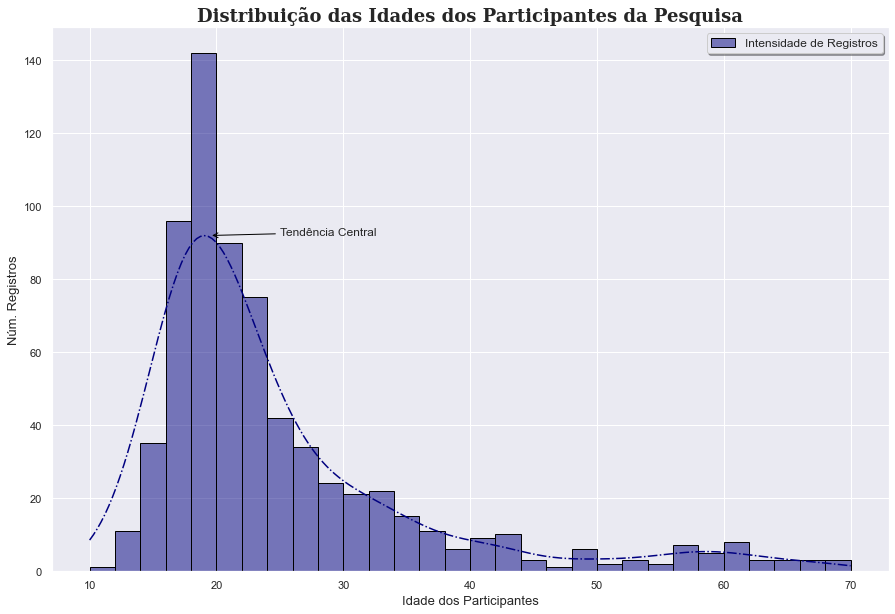

In [555]:
# Definindo tamanho:
fig, ax = plt.subplots(figsize=(15,10))

sns.histplot(
    data=data_clean, 
    x='Age', 
    color='navy', 
    binwidth=2, 
    label='Intensidade de Registros', 
    kde=True, 
    alpha=.5, 
    line_kws={'linestyle':'dashdot'}, 
    edgecolor='black'
)

# Formatação de títulos e labels:
plt.title(
    'Distribuição das Idades dos Participantes da Pesquisa', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
)

plt.xlabel('Idade dos Participantes', fontsize=13)
plt.ylabel('Núm. Registros', fontsize=13)

plt.annotate(
    'Tendência Central', 
    fontsize=12, 
    xy=(19.5,92), 
    xytext=(25,92), 
    arrowprops={'arrowstyle':'->', 'color':'black'}
)

# Plotando:
plt.legend(fontsize=12, fancybox=True, shadow=True)
plt.show()

Os registros de idade tendem a esquerda onde se agrupam em maior quantidade por volta dos 18 anos de idade, porém temos um range grande de idades (indo até 70 anos) dessa forma, é interessante avaliarmos quais são as características desses grupos etários.

Para isso, iremos dividir as idades entre:
- Jovens: até 19 anos;

- Adultos: entre 20 e 59 anos;

- Idosos: a partir de 60 anos.

Para facilitar o processo de plotagem, vamos criar uma nova coluna no nosso Dataset informando qual a faixa etária do indivíduo:

In [523]:
# Pegando valor mínimo e máximo da idade:
print(f'Idade mínima: {data_clean["Age"].min()}')
print(f'Idade máxima: {data_clean["Age"].max()}')

Idade mínima: 10
Idade máxima: 70


In [524]:
# Realizando a divisão de grupos de idade:
data_clean['Age group'] = pd.cut(data_clean['Age'], bins=[9, 19, 59, 70],
                                 labels=['Jovem', 'Adulto', 'Idoso'])

In [525]:
# Checando coluna:
data_clean['Age group'].value_counts()

Adulto    388
Jovem     285
Idoso      20
Name: Age group, dtype: int64

Com as faixas etárias definidas, vamos conferir quais os principais meios de streaming entre elas:

In [526]:
# Agrupando os dados pelo Age group e contagem dos streamings:
streaming_ages = (
    data_clean
    .groupby('Age group', as_index=False)[['Primary streaming service']]
    .value_counts()
    .rename(columns={'count':'quantity'})
)

streaming_ages

,Age group,Primary streaming service,quantity
0,Jovem,Spotify,201
1,Jovem,YouTube Music,31
2,Jovem,Apple Music,20
3,Jovem,Other streaming service,17
4,Jovem,I do not use a streaming service.,15
5,Jovem,Pandora,1
6,Adulto,Spotify,226
7,Adulto,YouTube Music,57
8,Adulto,I do not use a streaming service.,47
9,Adulto,Other streaming service,28


In [527]:
# Dividindo os dados nas 3 faixas etárias:
jovens = pd.DataFrame(streaming_ages.query('`Age group` == "Jovem"'))
adultos = pd.DataFrame(streaming_ages.query('`Age group` == "Adulto"'))
idosos = pd.DataFrame(streaming_ages.query('`Age group` == "Idoso"'))

### **Streaming services utilizados pelos jovens**

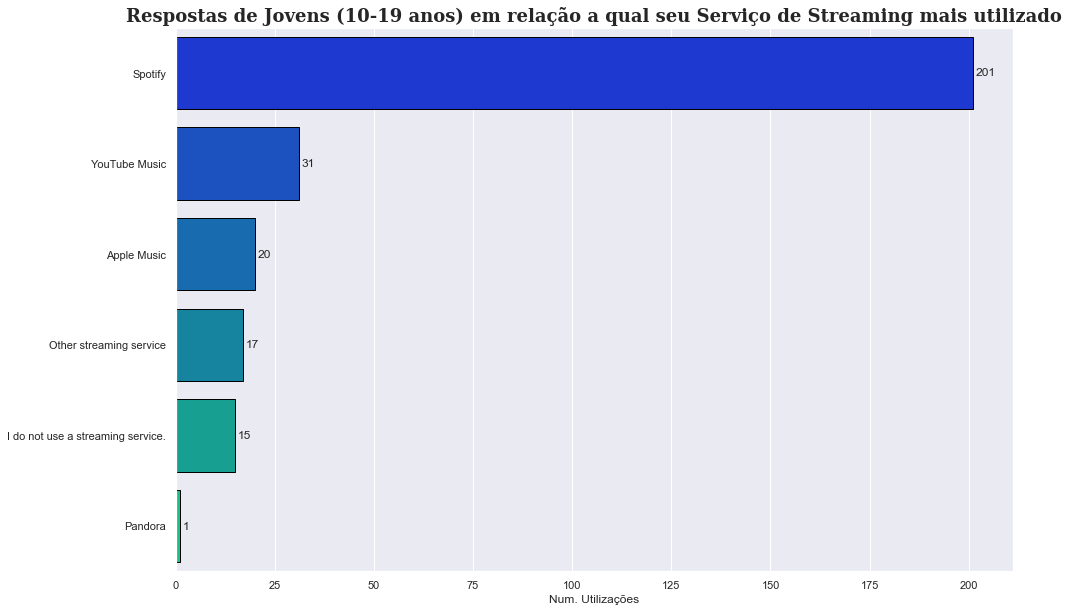

In [553]:
# Barplot dos jovens:
fig, ax = plt.subplots(figsize=(15,10))

ax1 = sns.barplot(
    x='quantity', 
    y='Primary streaming service',
    data=jovens, 
    edgecolor='black', 
    palette='winter'
)

# Definindo for loop para criação de valores ao final das barras:
for (labels) in ax1.containers:
    ax1.bar_label(labels, padding=3)

# Estilizando:
plt.title(
    'Respostas de Jovens (10-19 anos) em relação a qual seu Serviço de Streaming mais utilizado', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
)
plt.xlabel('Num. Utilizações', fontsize=12)
plt.ylabel('')
plt.show()

### **Streaming services utilizados pelos Adultos**

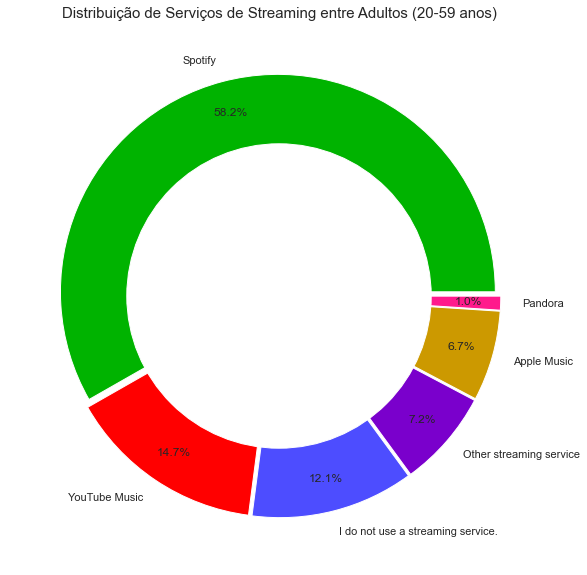

In [529]:
fig = plt.figure(figsize=(10, 10))

quantity = list(adultos['quantity'].values)
services = list(adultos['Primary streaming service'].values)
colors = ['#00b300', '#ff0000', '#4d4dff', '#7a00cc', '#cc9900', '#ff1a8c']
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.02)

pieCharts(quantity, services, colors, explode, 'Distribuição de Serviços de Streaming entre Adultos (20-59 anos)')

### **Streaming services utilizados pelos idosos**

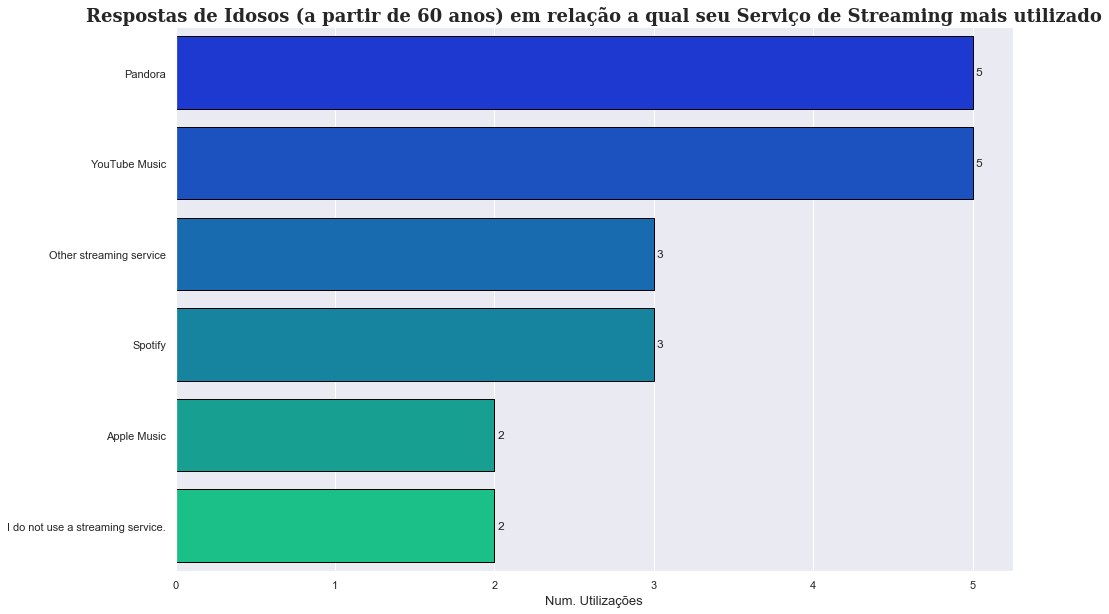

In [551]:
# Barplot dos idosos:
fig, ax = plt.subplots(figsize=(15,10))

ax1 = sns.barplot(
    x='quantity', 
    y='Primary streaming service', 
    data=idosos, 
    edgecolor='black',
    palette='winter'
)

# Definindo for loop para criação de valores ao final das barras:
for labels in ax1.containers:
    ax1.bar_label(labels, padding=3)

# Estilizando:
plt.title(
    'Respostas de Idosos (a partir de 60 anos) em relação a qual seu Serviço de Streaming mais utilizado', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
    )
plt.xlabel('Num. Utilizações', fontsize=13)
plt.ylabel('')
plt.show()

## <font color='gold'> ***Metal, Rock e Saúde Mental: Qual a Relação? 🎸*** </font>

Sendo um apaixonado por metal e rock no geral, nessa parte da análise decidi me debruçar sobre a parcela dos dados que tem esses dois gêneros como favoritos e tentar compreender mais aspectos deles. Assim, algumas perguntas que pretendo responder são:

***1.*** Qual faixa etária que mais escuta metal e rock? E a média de idade?

***2.*** Qual a média dessas pessoas de Ansiedade, Depressão, Insônia e TOC? Essas condições possuem correlações entre elas?

***3.*** Qual a porcentagem de metaleiros/rockeiros que também é produtor musical? E exploradores?

***4.*** Quais outros gêneros musicais metaleiros e rockeiros costumam ouvir geralmente?

***5.*** Qual a média de horas por dia que metaleiros e rockeiros escutam musica?

### **1. Qual faixa etária que mais escuta metal e rock? E a média de idade?**

Primeiro, iremos criar uma nova cópia do Dataset contendo apenas os dados de metaleiros e rockeiros:

In [531]:
# Criando o dataset e visualizando uma sample:
rock_metal_data = data_clean.query('`Fav genre` == "Metal" | `Fav genre` == "Rock"')
rock_metal_data.sample(5)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Games music,Anxiety,Depression,Insomnia,OCD,Music effects,Age group
449,25,Spotify,4.0,True,True,True,Rock,True,True,120,Sometimes,Rarely,Rarely,Very frequently,Rarely,Sometimes,Sometimes,Rarely,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Sometimes,Very frequently,Very frequently,6,2,3,2,Improve,Adulto
589,24,Spotify,10.0,True,True,True,Rock,True,True,180,Sometimes,Never,Never,Rarely,Never,Never,Never,Never,Never,Rarely,Sometimes,Sometimes,Never,Never,Very frequently,Sometimes,7,9,10,0,Improve,Adulto
297,16,Spotify,3.0,True,True,True,Rock,True,True,120,Never,Rarely,Never,Rarely,Never,Never,Never,Never,Sometimes,Never,Rarely,Rarely,Rarely,Rarely,Very frequently,Rarely,9,8,6,2,Improve,Jovem
286,18,Spotify,5.0,True,True,True,Rock,True,True,120,Rarely,Never,Rarely,Rarely,Never,Rarely,Never,Rarely,Never,Rarely,Sometimes,Very frequently,Rarely,Sometimes,Very frequently,Very frequently,8,8,8,6,Improve,Jovem
301,22,Spotify,3.0,True,True,True,Rock,True,True,90,Never,Very frequently,Rarely,Sometimes,Never,Rarely,Sometimes,Never,Very frequently,Never,Rarely,Sometimes,Very frequently,Sometimes,Very frequently,Never,10,10,4,0,Improve,Adulto


In [532]:
# Agrupando dataset:
genre_ages = (
    rock_metal_data
    .groupby('Age group', as_index=False)[['Fav genre']]
    .value_counts()
    .rename(columns={'count':'Qtde'})
)

genre_ages

,Age group,Fav genre,Qtde
0,Jovem,Rock,54
1,Jovem,Metal,22
2,Adulto,Rock,113
3,Adulto,Metal,54
4,Idoso,Rock,12
5,Idoso,Metal,0


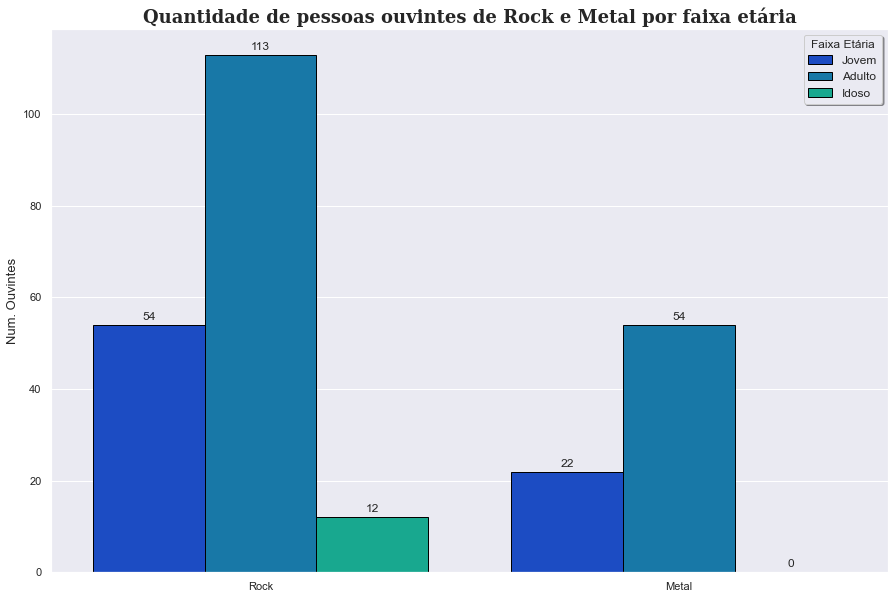

In [550]:
# Barplot:
fig, ax = plt.subplots(figsize=(15,10))

ax1 = sns.barplot(
    x='Fav genre', 
    y='Qtde', 
    data=genre_ages, 
    edgecolor='black', 
    palette='winter', 
    hue='Age group'
)

# Definindo for loop para criação de valores ao final das barras:
for labels in ax1.containers:
    ax1.bar_label(labels, padding=3)

# Estilizando:
plt.title(
    'Quantidade de pessoas ouvintes de Rock e Metal por faixa etária', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
    )

plt.xlabel('')
plt.ylabel('Num. Ouvintes', fontsize=13)

plt.legend(
    fontsize=12, 
    fancybox=True, 
    shadow=True, 
    title='Faixa Etária'
)

plt.show()

Temos a informação de que a maior audiêcia dos gêneros Rock e Metal são adultos, seguidos pelos jovens. Agora, a média de idades:

In [534]:
# Checando a média de idade dos ouvintes:
mean_age = (
    rock_metal_data
    .groupby('Fav genre', as_index=False)[['Age']]
    .mean()
    .round()
)
mean_age

,Fav genre,Age
0,Metal,25.0
1,Rock,28.0


### **2. Qual a média dessas pessoas de Ansiedade, Depressão, Insônia e TOC?**

In [535]:
# Agrupando dados para termos as médias:
mental_means = (
       rock_metal_data
       .groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
       .mean()
       .round(2)
)

mental_means

,Anxiety,Depression,Insomnia,OCD
Fav genre,,,,
Metal,5.71,5.05,4.59,2.51
Rock,6.18,5.26,3.87,2.65


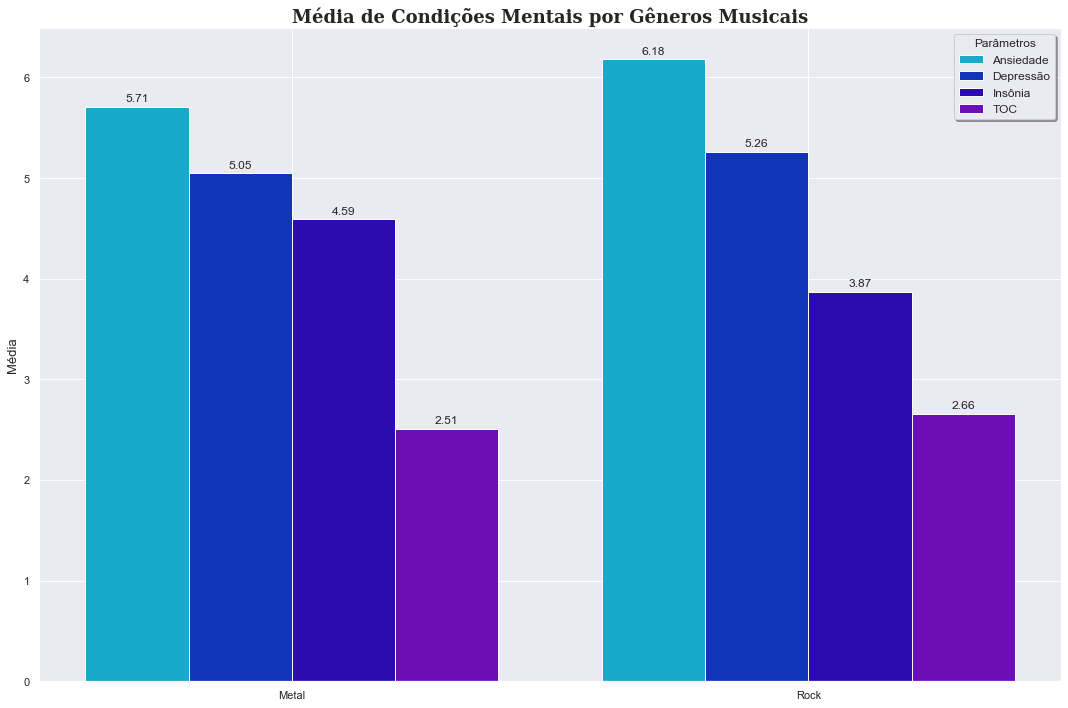

In [548]:
fig, ax = plt.subplots(figsize=(15,10))

# Definindo labels e valores das barras:
labels = ['Metal', 'Rock']
anx_mean = [5.71, 6.18]
dep_mean = [5.05, 5.26]
ins_mean = [4.59, 3.87]
ocd_mean = [2.51, 2.66]

# Definindo posição dos labels e width das barras:
label_loc = np.arange(len(labels))
width = 0.20

# Plotando as barras individuais:
anx_plot = plt.bar(label_loc + width, anx_mean, width, label='Ansiedade', color='#1BA9CB')
dep_plot = plt.bar(label_loc + width*2, dep_mean, width, label='Depressão', color='#1035B6')
ins_plot = plt.bar(label_loc + width*3, ins_mean, width, label='Insônia', color='#2E0BAF')
ocd_plot = plt.bar(label_loc + width*4, ocd_mean, width, label='TOC', color='#6C0DB6')

# Estilizando labels e título:
plt.ylabel('Média', fontsize=13)

plt.title(
    'Média de Condições Mentais por Gêneros Musicais', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
)

plt.xticks(label_loc + width*2.5, ['Metal', 'Rock'])
plt.legend(fontsize=12, fancybox=True, shadow=True, title='Parâmetros')

# Ajustando posição dos labels de valores das barras:
plt.bar_label(anx_plot, padding=3)
plt.bar_label(dep_plot, padding=3)
plt.bar_label(ins_plot, padding=3)
plt.bar_label(ocd_plot, padding=3)

# Plotando:
plt.tight_layout()
plt.show()

Com a visualização vemos que temos uma divisão nos dados, metaleiros aparentam ter médias maiores de Insônia e Rockeiros médias maiores em Ansiedade, Depressão e TOC.

Podemos comparar essas médias com as de outros ouvintes de gêneros diferentes para comparação:

In [537]:
# Selecionando médias:
genres_means = (
    data_clean
    .groupby('Fav genre', as_index=False)[['Anxiety', 'Depression', 'Insomnia', 'OCD']]
    .mean()
)

# Estilizando highlights:
(
    genres_means
    .style
    .highlight_max(
        axis=0,
        props='background-color:red;',
        subset=['Anxiety', 'Depression', 'Insomnia', 'OCD']
    )
    .highlight_min(
        axis=0,
        props='background-color:green;',
        subset=['Anxiety', 'Depression', 'Insomnia', 'OCD']
    )
)

,Fav genre,Anxiety,Depression,Insomnia,OCD
0,Classical,4.803922,4.078431,3.705882,2.392157
1,Country,5.400000,4.320000,2.720000,2.760000
2,EDM,5.393939,5.000000,3.878788,2.909091
3,Folk,6.586207,5.103448,3.586207,2.275862
4,Gospel,5.600000,3.200000,6.400000,0.400000
5,Hip hop,6.235294,5.676471,3.294118,2.794118
6,Jazz,5.823529,4.823529,3.823529,2.647059
7,K pop,6.166667,4.375000,3.333333,2.458333
8,Latin,4.333333,3.000000,3.333333,1.666667
9,Lofi,6.100000,6.600000,5.600000,3.400000


Com a tabela vemos que Rock e Metal não possuem valores mínimos ou máximos em suas médias. Essas sendo compostas por:

***Ansiedade***
- Maior: Folk - 6.6 pontos
- Menor: Latin - 4.3 pontos

***Depressão***
- Maior: Lofi - 6.6 pontos
- Menor: Latin - 3.0 pontos

***Insônia***
- Maior: Gospel - 6.4 pontos
- Menor: Rap - 2.5 pontos

***TOC***
- Maior: Lofi - 3.4 pontos
- Menor: Gospel - 0.4 pontos

### **3. Qual a porcentagem de metaleiros/rockeiros que também é produtor musical? E exploradores?**

In [538]:
# Coletando dados necessários
composers = (
    rock_metal_data
    .groupby('Fav genre', as_index=False)['Composer']
    .value_counts()
)

explorers = (
    rock_metal_data
    .groupby('Fav genre', as_index=False)['Exploratory']
    .value_counts()
)

display(composers)
print('=-'*20)
display(explorers)

,Fav genre,Composer,count
0,Metal,True,76
1,Rock,True,179


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


,Fav genre,Exploratory,count
0,Metal,True,76
1,Rock,True,179


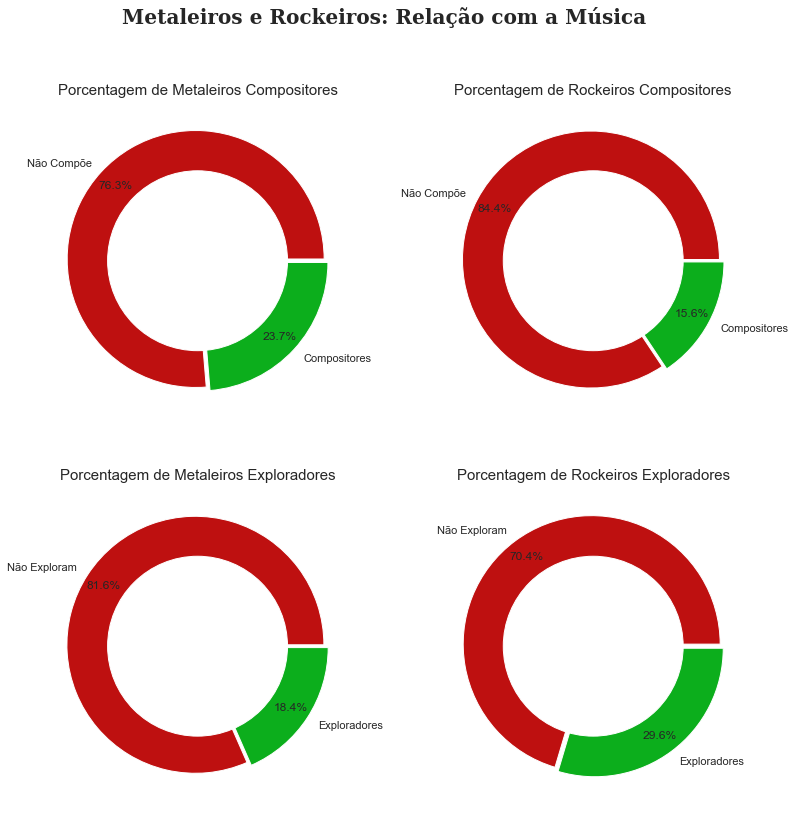

In [539]:
fig = plt.figure(figsize=(13, 13))

# Gráfico 1: Metaleiros Compositores
fig.add_subplot(221)
pieCharts(
    [58, 18], ['Não Compõe', 'Compositores'], ['#BE1010', '#0CAE1C'], 
    (0.02, 0.02), 'Porcentagem de Metaleiros Compositores'
)

# Gráfico 2: Rockeiros Compositores
fig.add_subplot(222)
pieCharts(
    [151, 28], ['Não Compõe', 'Compositores'], ['#BE1010', '#0CAE1C'], 
    (0.02, 0.02), 'Porcentagem de Rockeiros Compositores'
)

# Gráfico 3: Metaleiros Exploradores
fig.add_subplot(223)
pieCharts(
    [62, 14], ['Não Exploram', 'Exploradores'], ['#BE1010', '#0CAE1C'],
    (0.02, 0.02), 'Porcentagem de Metaleiros Exploradores'
)

# Gráfico 4: Rockeiros Exploradores
fig.add_subplot(224)
pieCharts(
    [126, 53], ['Não Exploram', 'Exploradores'], ['#BE1010', '#0CAE1C'],
    (0.02, 0.02), 'Porcentagem de Rockeiros Exploradores'
)

plt.suptitle(
    'Metaleiros e Rockeiros: Relação com a Música', 
    fontweight='bold',
    fontsize=20,
    fontfamily='serif'
)
    
plt.show()

### **4. Quais outros gêneros musicais metaleiros e rockeiros costumam ouvir geralmente?**

- Metaleiros:

In [558]:
# Criando um dataset apenas com dados de Metaleiros:
freq_metal = rock_metal_data.query('`Fav genre` == "Metal"')[[
    'Fav genre', 'Classical', 'Country', 'EDM', 'Folk', 
    'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 
    'Pop', 'R&B', 'Rap', 'Rock', 'Games music'
]]

freq_metal.head()

,Fav genre,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Pop,R&B,Rap,Rock,Games music
32,Metal,Never,Never,Never,Rarely,Never,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Never,Never,Sometimes,Sometimes
44,Metal,Rarely,Never,Never,Never,Never,Very frequently,Rarely,Never,Never,Never,Sometimes,Sometimes,Very frequently,Very frequently,Very frequently
48,Metal,Never,Never,Rarely,Rarely,Never,Very frequently,Rarely,Never,Rarely,Rarely,Sometimes,Rarely,Very frequently,Very frequently,Never
63,Metal,Rarely,Rarely,Rarely,Sometimes,Never,Rarely,Never,Rarely,Never,Rarely,Sometimes,Never,Rarely,Very frequently,Very frequently
65,Metal,Very frequently,Never,Rarely,Very frequently,Never,Never,Never,Sometimes,Never,Rarely,Rarely,Never,Never,Sometimes,Very frequently


In [559]:
# Contando registros onde metaleiros escutam com muita frequência outros gêneros:
df_metal = (
    pd.DataFrame(freq_metal[freq_metal == 'Very frequently'].count())
    .reset_index()
    .rename(
        columns={'index':'Genres', 0:'Frequencies'}
    )
    .drop(0)
    .sort_values(
        by='Frequencies', ascending=False
    )
)

df_metal

,Genres,Frequencies
14,Rock,49
15,Games music,14
11,Pop,8
13,Rap,6
3,EDM,5
4,Folk,5
6,Hip hop,5
10,Lofi,5
1,Classical,4
12,R&B,3


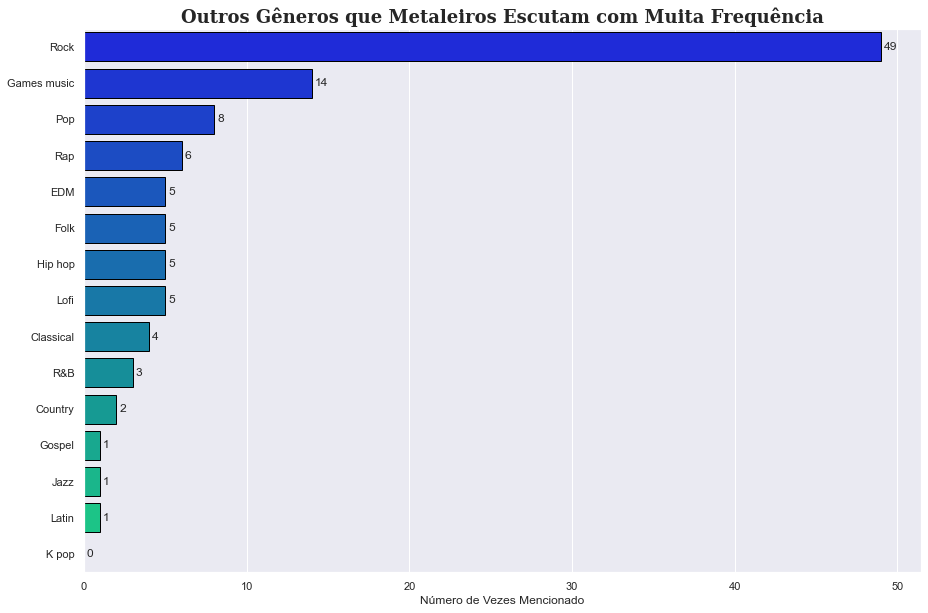

In [547]:
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(
    data=df_metal, 
    x='Frequencies', 
    y='Genres', 
    edgecolor='black', 
    palette='winter'
)

for (labels) in ax.containers:
    ax.bar_label(labels, padding=3)

plt.title(
    'Outros Gêneros que Metaleiros Escutam com Muita Frequência', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
    )

plt.xlabel('Número de Vezes Mencionado', fontsize=12)
plt.ylabel('')
plt.show()

Vemos que metaleiros escutam principalmente Rock com muita frequência, o que faz sentido tendo a proximidade dos dois gêneros. Em segundo como gênero escutado com mais frequência temos músicas de video game.

Os gêneros menos ouvidos pelos Metaleiros são a música gospel, jazz, música latina e k-pop, que não recebeu nenhum registro.

- Rockeiros:

In [565]:
# Criando um dataset apenas com dados de Rockeiros:
freq_rock = rock_metal_data.query('`Fav genre` == "Rock"')[[
    'Fav genre', 'Classical', 'Country', 'EDM', 'Folk', 
    'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 
    'Metal', 'Pop', 'R&B', 'Rap', 'Games music'
]]

freq_rock.head()

,Fav genre,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Games music
1,Rock,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Rarely
8,Rock,Never,Very frequently,Never,Sometimes,Never,Never,Never,Never,Never,Never,Very frequently,Never,Never,Never,Never
24,Rock,Rarely,Rarely,Never,Rarely,Sometimes,Sometimes,Sometimes,Never,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Sometimes
26,Rock,Sometimes,Sometimes,Rarely,Rarely,Rarely,Very frequently,Sometimes,Never,Never,Very frequently,Never,Very frequently,Very frequently,Very frequently,Sometimes
30,Rock,Never,Rarely,Rarely,Very frequently,Never,Very frequently,Sometimes,Never,Sometimes,Sometimes,Very frequently,Sometimes,Sometimes,Sometimes,Rarely


In [566]:
# Contando registros onde rockeiros escutam com muita frequência outros gêneros:
df_rock = (
    pd.DataFrame(freq_rock[freq_rock == 'Very frequently'].count())
    .reset_index()
    .rename(
        columns={'index':'Genres', 0:'Frequencies'}
    )
    .drop(0)
    .sort_values(
        by='Frequencies', ascending=False
    )
)

df_rock

,Genres,Frequencies
12,Pop,56
11,Metal,37
4,Folk,24
15,Games music,22
10,Lofi,15
13,R&B,14
1,Classical,12
14,Rap,11
3,EDM,10
6,Hip hop,10


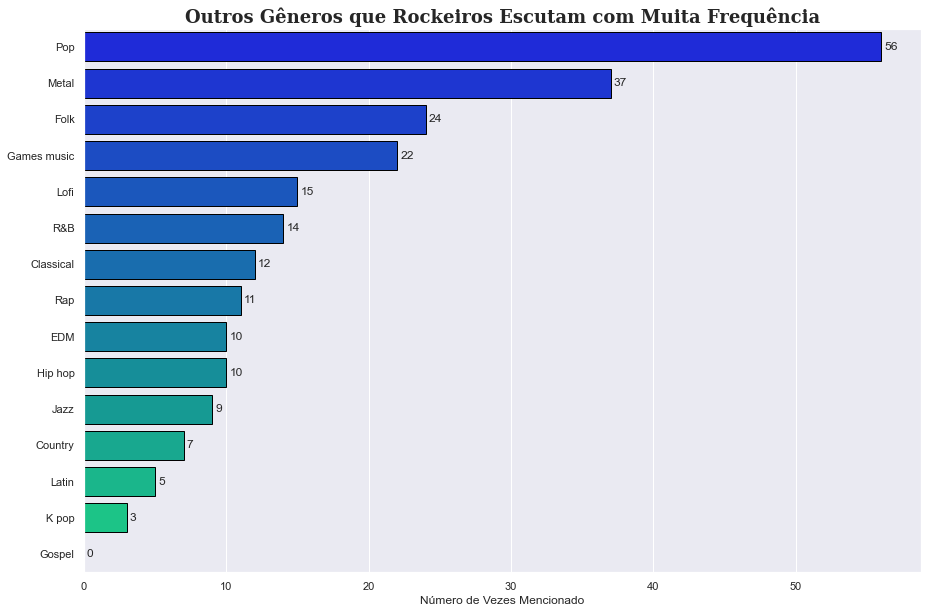

In [567]:
# Plotando:
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(
    data=df_rock, 
    x='Frequencies', 
    y='Genres', 
    edgecolor='black', 
    palette='winter'
)

for (labels) in ax.containers:
    ax.bar_label(labels, padding=3)

plt.title(
    'Outros Gêneros que Rockeiros Escutam com Muita Frequência', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
)

plt.xlabel('Número de Vezes Mencionado', fontsize=12)
plt.ylabel('')
plt.show()

### **5. Qual a média de horas por dia que metaleiros e rockeiros escutam musica?**

In [568]:
# Agrupando dados para termos as médias de horas:
avg_time = (
    rock_metal_data
    .groupby('Fav genre', as_index=False)[['Hours per day']]
    .mean()
    .round(2)
)

avg_time

,Fav genre,Hours per day
0,Metal,3.500000
1,Rock,3.339844


Comparando com os outros gêneros:

In [569]:
# Agrupando dados e coletando médias de todos os gêneros:
genres = (
    pd.DataFrame(
        data_clean
        .groupby('Fav genre', as_index=False)['Hours per day']
        .mean()
        .round(2)
        .sort_values(by='Hours per day', ascending=False)
    )
)

genres

,Fav genre,Hours per day
8,Latin,6.671875
6,Jazz,4.441406
9,Lofi,4.199219
2,EDM,4.000000
7,K pop,3.660156
5,Hip hop,3.630859
10,Metal,3.500000
12,R&B,3.480469
13,Rap,3.449219
1,Country,3.419922


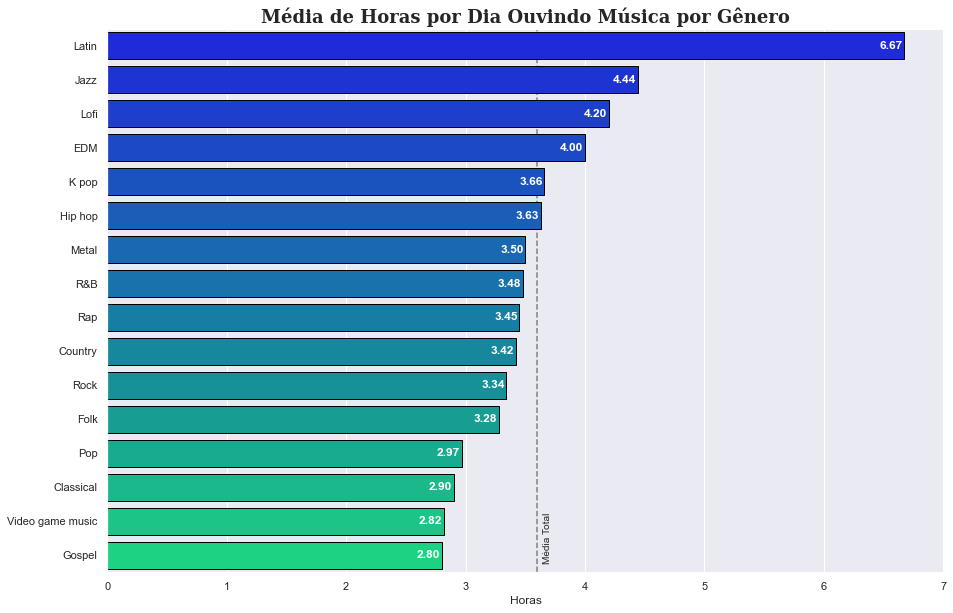

In [571]:
# Plotando:
fig, ax = plt.subplots(figsize=(15,10))

sns.barplot(
    data=genres, 
    x='Hours per day', 
    y='Fav genre', 
    edgecolor='black', 
    palette='winter', 
    zorder=2
)

# Formatando labels:
for (labels) in ax.containers:
    ax.bar_label(labels, padding=-25, fmt='%.2f', color='w', fontweight='bold')

plt.title(
    'Média de Horas por Dia Ouvindo Música por Gênero', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
)

# Adicionando linha de média:
plt.axvline(x = 3.6,
            ymin = 0,
            ymax = 1,
            linewidth = 1.5, 
            linestyle ="--",
            color ='gray', 
            zorder=1
)

plt.annotate(
    'Média Total', 
    fontsize=10, 
    xy=(3.65, 15.2), 
    rotation=90
)

plt.xlabel('Horas', fontsize=12)
plt.ylabel('')
plt.show()

Temos a Música Latina com a maior média, cerca de 6 horas e meia por dia, seguida por Jazz com cerca de 4 horas e meia por dia.

Com a visualização, vemos que Metal está um pouco a baixo da média total de horas ouvidas (3.6), com 3.5 horas por dia. Já o Rock se encontra mais abaixo com 3.34 horas por dia.